<a href="https://colab.research.google.com/github/sonivarun01/ai-ml-colab-projects/blob/main/Group_Cross_Validation_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import(
    GroupKFold,
    LeaveOneGroupOut,
    cross_validate,
    GridSearchCV,
)

In [ ]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [ ]:
y = y.map({0:1,1:0})

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
patient_list = [p for p in range(10)]
np.random.seed(1)
X['patient'] = np.random.choice(patient_list, size=len(X))

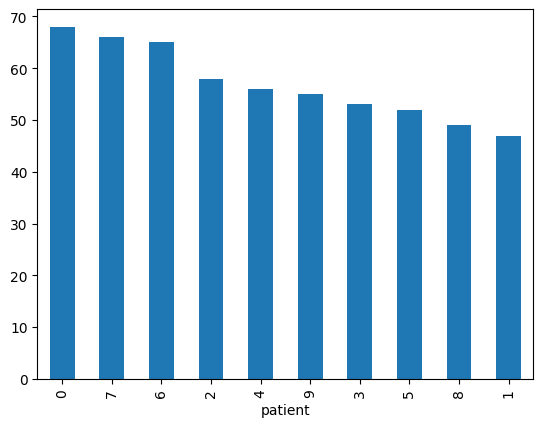

In [ ]:
X['patient'].unique()
X['patient'].value_counts().plot.bar()
plt.show()

In [ ]:
X_train = X[X['patient'] !=7]
y_train = y.iloc[X_train.index]
X_test = X[X['patient'] == 7]
y_test = y.iloc[X_test.index]

In [ ]:
#Group K-Fold CV
logit = LogisticRegression(penaltyl2',C=10,solver='liblinear',random_state=4,max_iter=10000)
gkf = GroupKFold(n_splits=5)

clf= cross_validate(
    logit,
    X_train.drop('patient',axis=1),
    y_train,
    scoring='accuracy',
    return_train_score = True,
    cv=gkf.split(X_train.drop('patient',axis=1),y_train,groups = X_train['patient'])
)
clf['train_score']='

array([0.97011494, 0.96419437, 0.97727273, 0.96962025, 0.97721519])

In [ ]:
clf['test_score']


array([0.94117647, 0.98214286, 0.94392523, 0.94444444, 0.96296296])

In [ ]:
print('mean train set accuracy: ', np.mean(clf['train_score']), ' +- ',
np.std(clf['train_score']))
print('mean test set accuracy: ', np.mean(clf['test_score']), ' +- ',
np.std(clf['test_score']))

mean train set accuracy:  0.9716834972481945  +-  0.004992863539378984
mean test set accuracy:  0.954930393756672  +-  0.01565426086525203


In [ ]:
logit.fit(X_train.drop('patient', axis=1), y_train)
train_preds = logit.predict(X_train.drop('patient', axis=1))
test_preds = logit.predict(X_test.drop('patient', axis=1))
print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

Train Accuracy:  0.9721669980119284
Test Accuracy:  0.9545454545454546


In [ ]:
logit = LogisticRegression(penalty='l2', C=10, solver='liblinear',
random_state=4, max_iter=10000)
logo = LeaveOneGroupOut()
clf = cross_validate(
logit,
X_train.drop('patient', axis=1),
y_train,
scoring='accuracy',
return_train_score=True,
cv=logo.split(X_train.drop('patient', axis=1), y_train,
groups=X_train['patient']),
)
print('mean train set accuracy: ', np.mean(clf['train_score']), ' +- ',
np.std(clf['train_score']))
print('mean test set accuracy: ', np.mean(clf['test_score']), ' +- ',
np.std(clf['test_score']))

mean train set accuracy:  0.9709186340440912  +-  0.003656672435174436
mean test set accuracy:  0.9633545684747165  +-  0.02597041307009602


In [ ]:
logit = LogisticRegression(penalty='l2', C=1, solver='liblinear',
random_state=4, max_iter=10000)
param_grid = dict(penalty=['l1', 'l2'], C=[0.1, 1, 10])
logo = LeaveOneGroupOut()
clf = GridSearchCV(
logit,
param_grid,
scoring='accuracy',
cv=logo.split(X_train.drop('patient', axis=1), y_train,
groups=X_train['patient']),
refit=True,
)
search = clf.fit(X_train.drop('patient', axis=1), y_train)
search.best_params_

{'C': 10, 'penalty': 'l1'}

Text(0.5, 0, 'Hyperparameter space')

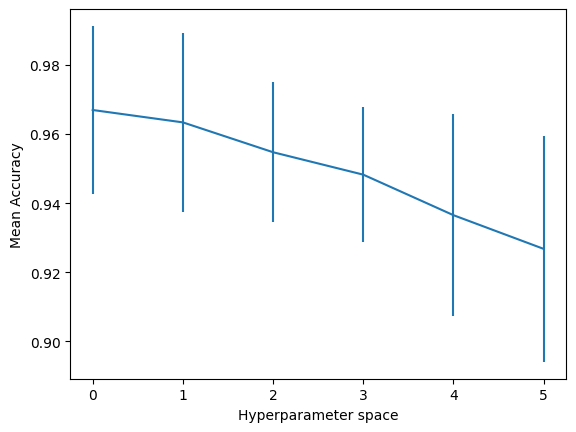

In [ ]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score',
'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'],
results['std_test_score']], subplots=True)
plt.ylabel('Mean Accuracy')
plt.xlabel('Hyperparameter space')

In [ ]:
train_preds = search.predict(X_train.drop('patient', axis=1))
test_preds = search.predict(X_test.drop('patient', axis=1))
print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

Train Accuracy:  0.9860834990059643
Test Accuracy:  0.9545454545454546
